<a href="https://colab.research.google.com/github/hvarS/MLRefer/blob/Distance-Based-Regression-and-Classification/KNNExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The Dataset that I am using is PIMA Diabetes Dataset ( Indian )

In [4]:
df = pd.read_csv("PimaIndiansDiabetes.csv")

In [11]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'Class'],
      dtype='object')

###Standardizing the dataset predictors

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('Class',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(df.drop("Class",axis = 1))

In [17]:
df_with_sfeat = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [18]:
df_with_sfeat.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
0,0.348433,0.0,0.712372,-0.234257,0.484208,-0.201735,0.577059,-0.954679,0.964074,-0.297510,0.668655,-0.673107,0.316673,-1.098543,0.400678,-0.990486,0.747985,-0.769681,0.356155,-0.574715,0.382644,-0.589524,0.011585,-0.790129,0.297728,-0.867565,-0.253868,-0.713971,-0.288290,-0.617039,0.122937,-1.055054,-0.312221,-0.999595
1,0.348433,0.0,0.721648,-0.527811,0.634308,-1.037587,-1.339106,-2.029452,0.964074,-0.469482,0.057860,-1.684781,-0.090908,-1.599628,-1.320774,-2.285870,-0.529798,-1.247351,-0.045252,-1.882900,-0.768862,-0.891518,-0.900696,-0.569455,-1.037790,-0.383054,-1.447849,-0.208419,-0.989185,-0.173530,-0.909063,-0.115213,-0.932605,-0.083286
2,0.348433,0.0,0.721648,-0.176998,0.768477,-0.241309,0.914531,-0.461494,0.746139,-0.350536,0.452533,-0.205582,0.730129,-0.172297,0.309483,-0.148874,0.738571,-0.267760,0.633158,-0.118408,0.611165,-0.547547,0.118384,-0.120018,0.310141,-0.651896,0.093506,-0.276586,0.091389,-0.287320,0.441318,-0.464092,0.404443,-0.848591
3,0.348433,0.0,0.721648,-1.125172,0.768477,1.921340,0.329433,-2.152585,-1.010873,-0.375331,-0.846256,-0.313776,-0.645102,-0.189033,-2.061919,0.161732,0.257626,-0.785566,-2.173722,-1.004455,-1.701995,1.916606,-0.601213,0.108990,1.045426,1.926340,-0.049490,1.947300,1.080843,-0.341218,-0.167687,1.957315,-1.289826,2.107299
4,0.348433,0.0,0.721648,-0.155129,0.655594,-0.109918,0.754068,-0.676741,0.512838,-0.714742,0.092053,-0.724108,0.262818,-0.203441,-0.000321,-0.755275,0.238927,-0.431774,0.146601,-0.297308,-0.454670,-0.703569,-0.562915,-0.894969,-0.628910,-1.143025,-0.792950,-0.842112,-0.615818,-1.171144,-0.717726,-1.154227,-0.757673,-1.435736


###Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df["Class"],test_size = 0.3)

###Use KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
pred = knn.predict(x_test)

###Checking Metrics to understand the performance

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[27 12]
 [ 1 66]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.81        39
           1       0.85      0.99      0.91        67

    accuracy                           0.88       106
   macro avg       0.91      0.84      0.86       106
weighted avg       0.89      0.88      0.87       106



###Choosing the ideal k - value 

In [31]:
from sklearn.model_selection import cross_val_score

In [34]:
accuracy_scores = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  a_score = cross_val_score(knn,scaled_features,df["Class"],cv = 10)
  accuracy_scores.append(np.mean(a_score))

In [28]:
error_rates = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rates.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Accuracy Scores')

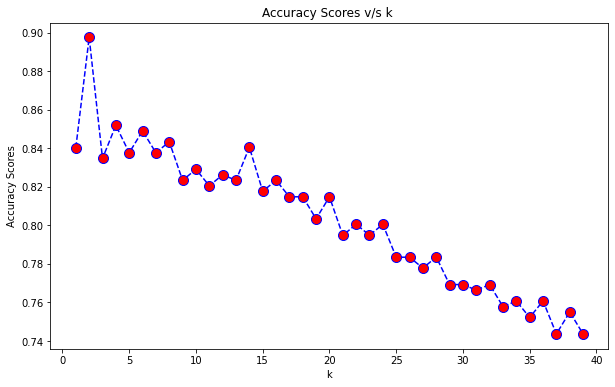

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_scores,color = "blue",linestyle = "dashed",marker = "o",markerfacecolor = "red",markersize = 10)
plt.title("Accuracy Scores v/s k ")
plt.xlabel("k")
plt.ylabel("Accuracy Scores")

Text(0, 0.5, 'Error Rate')

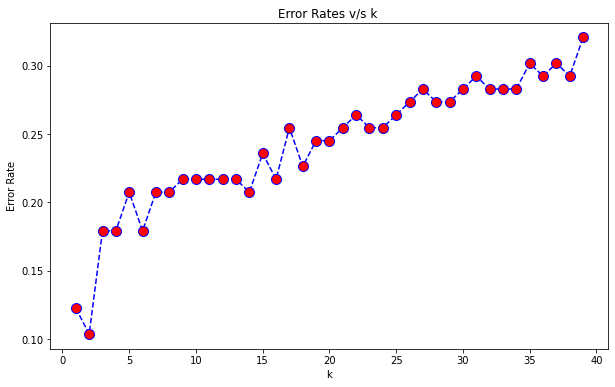

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates,color = "blue",linestyle = "dashed",marker = "o",markerfacecolor = "red",markersize = 10)
plt.title("Error Rates v/s k ")
plt.xlabel("k")
plt.ylabel("Error Rate")

Using the best parameters as obtained above for k = 2

In [30]:
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  print(confusion_matrix(y_test,pred))
  print(classification_report(y_test,pred))

[[29 10]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        39
           1       0.87      0.99      0.92        67

    accuracy                           0.90       106
   macro avg       0.92      0.86      0.88       106
weighted avg       0.90      0.90      0.89       106

